In [1]:
import statistics as stats
import matplotlib.pyplot as plt
from collections import defaultdict
import math
import numpy as np
import seaborn as sns
import pandas as pd
import itertools
import random
from analysis_functions import *
font = {'size'   : 13}

plt.rc('font', **font)

/home/networklab/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [4]:
def per_slice_analysis(case_1_log_, case_2_log_, case_1_label_, case_2_label_, title_):
    case_1_log = case_1_log_
    case_2_log = case_2_log_
    case_1_label = case_1_label_
    case_2_label = case_2_label_
    case_1_tp = get_per_ue_throughput(case_1_log)
    case_2_tp = get_per_ue_throughput(case_2_log)

    case_1_ue_cell_comb = get_per_ue_cell_comb(case_1_log)
    case_2_ue_cell_comb = get_per_ue_cell_comb(case_2_log)

    colors_case_1 = ['r' for _ in range(len(case_1_tp))]
    for i in case_1_ue_cell_comb[0]:
        colors_case_1[i] = 'g'

    colors_case_2 = ['b' for _ in range(len(case_2_tp))]
    for i in case_2_ue_cell_comb[0]:
        colors_case_2[i] = 'gold'


    # Sort case_1_tp by key

    case_1_tp = sorted(case_1_tp.items())
    case_2_tp = sorted(case_2_tp.items())


    # make a barplot of the per UE TBS where the y axis is the value and the x axis is the key
    tbs_case_1 = []
    tbs_case_2 = []
    ticks = []

    for i in range(len(case_1_tp)):
        ticks.append(case_1_tp[i][0])
        tbs_case_1.append(case_1_tp[i][1])

    for i in range(len(case_2_tp)):
        tbs_case_2.append(case_2_tp[i][1])

    case_1_zero_counter = 0
    case_2_zero_counter = 0

    for i in tbs_case_1:
        if i < 0.5:
            case_1_zero_counter += 1
    for i in tbs_case_2:
        if i < 0.5:
            case_2_zero_counter += 1

    print(case_1_label , case_1_zero_counter)
    print(case_2_label , case_2_zero_counter)


    print('Sum Case 1: ', sum(tbs_case_1))
    print('Sum Case 2: ', sum(tbs_case_2))
    print('PF Case 1: ', sum([math.log10(v) for v in tbs_case_1]))
    print('PF Case 2: ', sum([math.log10(v) for v in tbs_case_2]))


    data = [tbs_case_1, tbs_case_2]
    xlabel = 'UEs'
    ylabel = 'TBS'
    labels = ['Micro UEs - No Muting', 'Micro UEs - Muting']
    colors = [colors_case_1, colors_case_2]


    N = len(data[0])
    ind = np.arange(N)
    plt.figure(figsize=(30,6))
    width = 0.3
    for i in range(len(data)):
        if colors != None:
            plt.bar(ind, data[i], width, label=labels[i], color=colors[i])
        else:
            plt.bar(ind, data[i], width, label=labels[i])
        ind = ind + width
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.yticks()
    plt.title(title_)

    # xticks()
    # First argument - A list of positions at which ticks should be placed
    # Second argument -  A list of labels to place at the given locations
    ind = np.arange(N)
    if (ticks != None):
        plt.xticks(ind + width / 2, ticks, rotation=90, fontsize=12)

    # Finding the best position for legends and putting it
    plt.legend(loc='best')
    plt.tight_layout(pad=0.1)
    plt.show()


In [7]:
per_slice_analysis('uni_logs/160_newdep/ea_pf_diff_8_uniform_deduction/1.log', 'uni_logs/160_newdep/ea_pf_diff_8_uniform_deduction/muting_1.log', 'No Muting', 'Muting', 'Per UE TP Performance in NEW Deployment for EA - 8 Slices')

IndexError: list assignment index out of range

mu_new_dep_320_no_mute 85
mu_new_dep_320_mute 61
Sum Case 1:  507.8723559510565
Sum Case 2:  510.11370856507193
PF Case 1:  7.980867528823005
PF Case 2:  18.131413301999427


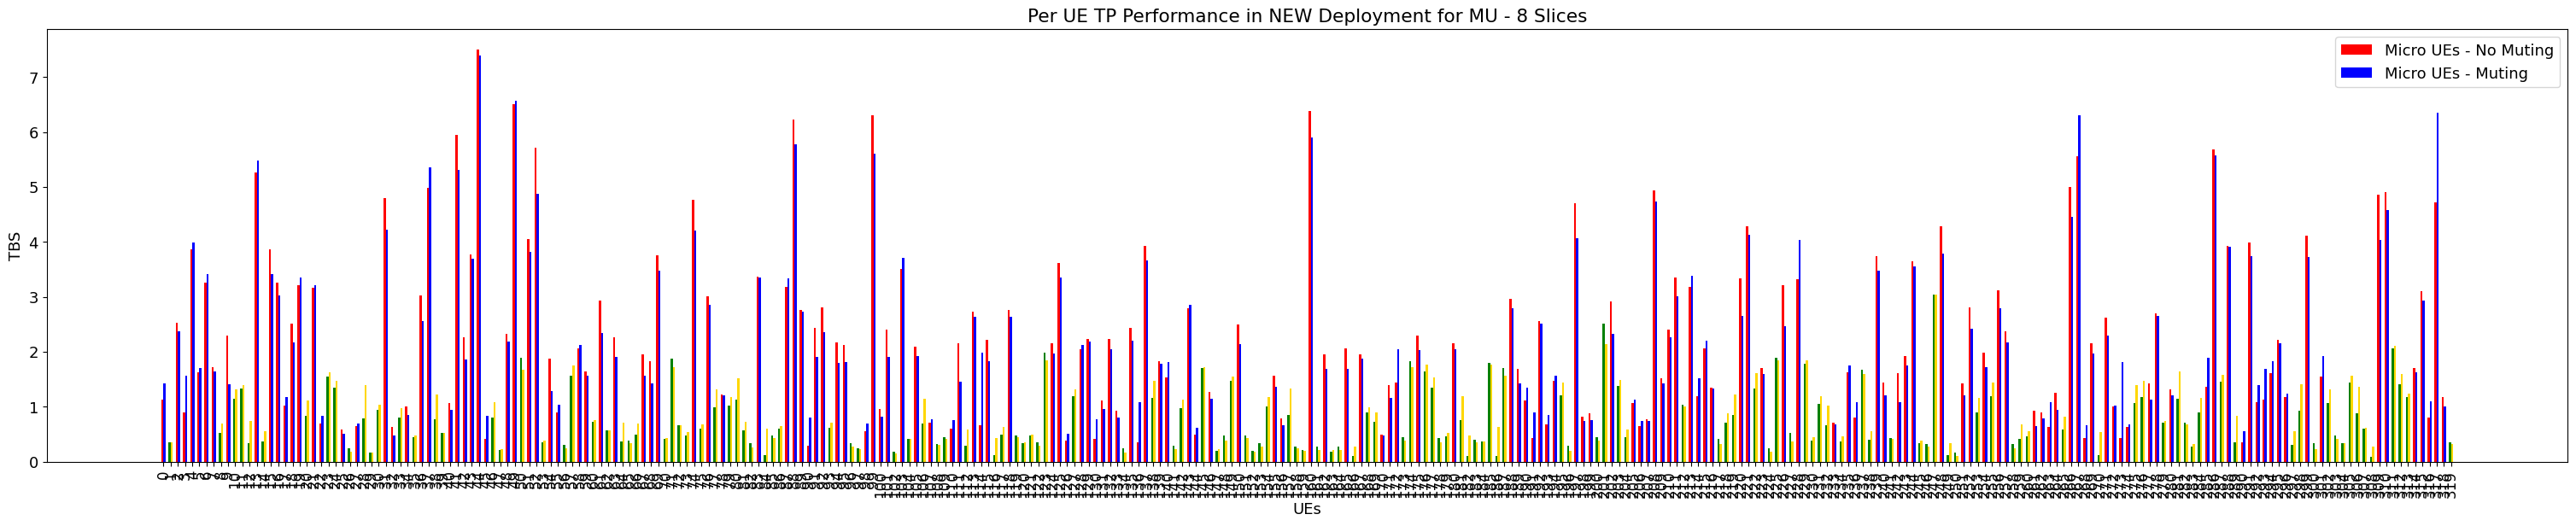

In [ ]:
per_slice_analysis('uni_logs/mu_newdeployment_8slice_320/1.log', 'uni_logs/mu_newdeployment_8slice_320/muting_1.log', 'mu_new_dep_320_no_mute', 'mu_new_dep_320_mute', 'Per UE TP Performance in NEW Deployment for MU - 8 Slices')

In [16]:

new_dep_no_mute = list(get_per_ue_throughput('uni_logs/ea_newdeployment_8slice_320/0.log').values())
new_dep_no_mute.sort()
new_dep_mute = list(get_per_ue_throughput('uni_logs/ea_newdeployment_8slice_320/muting_0.log').values())
new_dep_mute.sort()

old_dep_no_mute = list(get_per_ue_throughput('uni_logs/ea_olddeployment_8slice_320/0.log').values())
old_dep_no_mute.sort()
old_dep_mute = list(get_per_ue_throughput('uni_logs/ea_olddeployment_8slice_320/muting_0.log').values())
old_dep_mute.sort()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))

fig.suptitle('Performance of Individual Users in Exhaustive Algorithm - 8 Slice - 2X USERS', fontsize=12)
ax1.set_title('0-10th Percentile of Users - 8 Slice', fontsize=12, pad=10)
sns.ecdfplot(ax = ax1, data = new_dep_no_mute, label='New Deployment - No Muting')
sns.ecdfplot(ax = ax1, data = new_dep_mute, label='New Deployment - Muting')
sns.ecdfplot(ax = ax1, data = old_dep_no_mute, label='Old Deployment - No Muting')
sns.ecdfplot(ax = ax1, data = old_dep_mute, label='Old Deployment - Muting')
ax1.set(xlabel='Throughput (Mbps)', ylabel='CDF', xlim=(0, 0.4), ylim=(0, 0.1))
ax1.legend(fontsize=10)

ax2.set_title('0-25th Percentile of Users - 8 Slice', fontsize=12, pad=10)
sns.ecdfplot(ax = ax2, data = new_dep_no_mute, label='New Deployment - No Muting')
sns.ecdfplot(ax = ax2, data = new_dep_mute, label='New Deployment - Muting')
sns.ecdfplot(ax = ax2, data = old_dep_no_mute, label='Old Deployment - No Muting')
sns.ecdfplot(ax = ax2, data = old_dep_mute, label='Old Deployment - Muting')
ax2.set(xlabel='Throughput (Mbps)', ylabel='CDF', xlim=(0, 0.8), ylim=(0, 0.25))
ax2.legend(fontsize=10)

ax3.set_title('0-100th Percentile of Users - 8 Slice', fontsize=12, pad=10)
sns.ecdfplot(ax = ax3, data = new_dep_no_mute, label='New Deployment - No Muting')
sns.ecdfplot(ax = ax3, data = new_dep_mute, label='New Deployment - Muting')
sns.ecdfplot(ax = ax3, data = old_dep_no_mute, label='Old Deployment - No Muting')
sns.ecdfplot(ax = ax3, data = old_dep_mute, label='Old Deployment - Muting')
ax3.set(xlabel='Throughput (Mbps)', ylabel='CDF', xlim=(0, 15), ylim=(0, 1))
ax3.legend(fontsize=10)

fig.tight_layout()
fig.subplots_adjust(top=0.88)

FileNotFoundError: [Errno 2] No such file or directory: 'uni_logs/ea_newdeployment_8slice_320/0.log'

In [17]:
new_dep_no_mute = list(get_per_ue_throughput('uni_logs/mu_newdeployment_8slice_320/0.log').values())
new_dep_no_mute.sort()
new_dep_mute = list(get_per_ue_throughput('uni_logs/mu_newdeployment_8slice_320/muting_0.log').values())
new_dep_mute.sort()

old_dep_no_mute = list(get_per_ue_throughput('uni_logs/mu_olddeployment_8slice_320/0.log').values())
old_dep_no_mute.sort()
old_dep_mute = list(get_per_ue_throughput('uni_logs/mu_olddeployment_8slice_320/muting_0.log').values())
old_dep_mute.sort()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))

fig.suptitle('Performance of Individual Users in Multi Utility Algorithm - 8 Slice - 2X USERS', fontsize=12)
ax1.set_title('0-10th Percentile of Users - 8 Slice', fontsize=12, pad=10)
sns.ecdfplot(ax = ax1, data = new_dep_no_mute, label='New Deployment - No Muting')
sns.ecdfplot(ax = ax1, data = new_dep_mute, label='New Deployment - Muting')
sns.ecdfplot(ax = ax1, data = old_dep_no_mute, label='Old Deployment - No Muting')
sns.ecdfplot(ax = ax1, data = old_dep_mute, label='Old Deployment - Muting')
ax1.set(xlabel='Throughput (Mbps)', ylabel='CDF', xlim=(0, 0.4), ylim=(0, 0.1))
ax1.legend(fontsize=10)

ax2.set_title('0-25th Percentile of Users - 8 Slice', fontsize=12, pad=10)
sns.ecdfplot(ax = ax2, data = new_dep_no_mute, label='New Deployment - No Muting')
sns.ecdfplot(ax = ax2, data = new_dep_mute, label='New Deployment - Muting')
sns.ecdfplot(ax = ax2, data = old_dep_no_mute, label='Old Deployment - No Muting')
sns.ecdfplot(ax = ax2, data = old_dep_mute, label='Old Deployment - Muting')
ax2.set(xlabel='Throughput (Mbps)', ylabel='CDF', xlim=(0, 0.8), ylim=(0, 0.25))
ax2.legend(fontsize=10)

ax3.set_title('0-100th Percentile of Users - 8 Slice', fontsize=12, pad=10)
sns.ecdfplot(ax = ax3, data = new_dep_no_mute, label='New Deployment - No Muting')
sns.ecdfplot(ax = ax3, data = new_dep_mute, label='New Deployment - Muting')
sns.ecdfplot(ax = ax3, data = old_dep_no_mute, label='Old Deployment - No Muting')
sns.ecdfplot(ax = ax3, data = old_dep_mute, label='Old Deployment - Muting')
ax3.set(xlabel='Throughput (Mbps)', ylabel='CDF', xlim=(0, 15), ylim=(0, 1))
ax3.legend(fontsize=10)

fig.tight_layout()
fig.subplots_adjust(top=0.88)

FileNotFoundError: [Errno 2] No such file or directory: 'uni_logs/mu_newdeployment_8slice_320/0.log'

In [18]:
new_dep_no_mute = get_per_ue_throughput('uni_logs/new_deployment/ea_norealloc_8slice/1.log')
new_dep_mute = get_per_ue_throughput('uni_logs/new_deployment/ea_norealloc_8slice/muting_1.log')
old_dep_no_mute = get_per_ue_throughput('uni_logs/old_deployment/ea_norealloc_8slice/1.log')
old_dep_mute = get_per_ue_throughput('uni_logs/old_deployment/ea_norealloc_8slice/muting_1.log')
percentage_imp = {}
for k, v in new_dep_no_mute.items():
    no_mute_tp = new_dep_no_mute[k]
    mute_tp = new_dep_mute[k]
    percentage_imp[k] = (mute_tp - no_mute_tp) / no_mute_tp

percentage_imp = dict(sorted(percentage_imp.items(), key=lambda item: item[1]))

print('New Deployment')
for k, v in percentage_imp.items():
    if (v > 0):
        print(\
            # 'ID: ', k, 'No Mute TP: ', new_dep_no_mute[k], ' Mute TP: ', new_dep_mute[k], 'Percentage Improvement: ', 
            k, end = ' ')

print('-----------------------------------------------')
print('Old Deployment')
percentage_imp = {}
for k, v in old_dep_no_mute.items():
    no_mute_tp = old_dep_no_mute[k]
    mute_tp = old_dep_mute[k]
    percentage_imp[k] = (mute_tp - no_mute_tp) / no_mute_tp

percentage_imp = dict(sorted(percentage_imp.items(), key=lambda item: item[1]))

for k, v in percentage_imp.items():
    if (v > 0):
        print(\
            # 'ID: ', k, 'No Mute TP: ', old_dep_no_mute[k], ' Mute TP: ', old_dep_mute[k], 'Percentage Improvement: ',
         k, end = ' ')



FileNotFoundError: [Errno 2] No such file or directory: 'uni_logs/new_deployment/ea_norealloc_8slice/1.log'

In [19]:
def get_percentage_gain_muting_freq_per_cell(dname):
    file = open(dname, 'r')
    lines = file.readlines()
    file.close()
    gains = []
    for line in lines:
        if 'Muting Decision:' in line:
            spl = line.split()
            gain = float(spl[-1]) * 100
            if (gain < 0.001):
                continue
            else:
                gains.append(gain)
    return gains

gains_mu_tp = get_percentage_gain_muting_freq_per_cell('uni_logs/mu_norealloc_old_8_tp/muting_0.log')
gains_ea_tp = get_percentage_gain_muting_freq_per_cell('uni_logs/ea_norealloc_old_8_tp/muting_0.log')
gains_mu_pf = get_percentage_gain_muting_freq_per_cell('uni_logs/mu_norealloc_old_8_pf/muting_0.log')
gains_ea_pf = get_percentage_gain_muting_freq_per_cell('uni_logs/ea_norealloc_old_8_pf/muting_0.log')
# sns.ecdfplot(data = gains_mu_tp, label='Multi Utility Algorithm - MT')
sns.ecdfplot(data = gains_ea_tp, label='Exhaustive Algorithm - MT')
# sns.ecdfplot(data = gains_mu_pf, label='Multi Utility Algorithm - PF')
sns.ecdfplot(data = gains_ea_pf, label='Exhaustive Algorithm - PF')
plt.xlim(0, 100)
plt.legend()
plt.xlabel('Percentage Gain in Metric')
plt.grid()
plt.title('Gain in Metric when Muting for Different Metrics', fontsize=12, pad=10)


FileNotFoundError: [Errno 2] No such file or directory: 'uni_logs/mu_norealloc_old_8_tp/muting_0.log'

(0.0, 500.0)

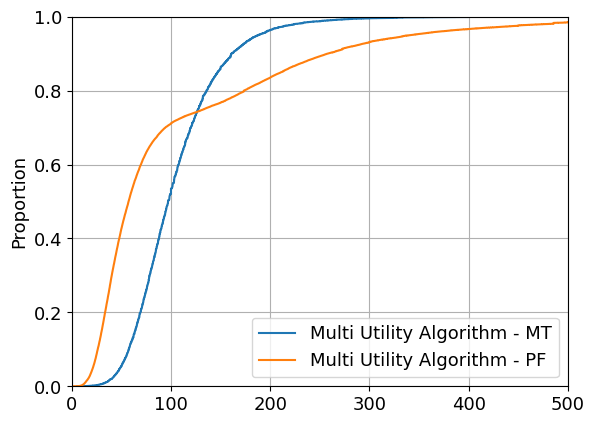

In [69]:
gains_mu_new_tp = get_percentage_gain_muting_freq_per_cell('uni_logs/mu_norealloc_old_8_tp_exhaust/muting_0.log')
gains_mu_new_pf = get_percentage_gain_muting_freq_per_cell('uni_logs/mu_norealloc_old_8_pf_exhaust/muting_0.log')

sns.ecdfplot(data = gains_mu_new_tp, label='Multi Utility Algorithm - MT')
sns.ecdfplot(data = gains_mu_new_pf, label='Multi Utility Algorithm - PF')
plt.grid()
plt.legend()
plt.xlim(0, 500)
plt.title('Gain in Metric when Muting for Different Metrics', fontsize=12, pad=10)


Users which lose out due to muting

In [20]:
new_dep_no_mute = get_per_ue_throughput('uni_logs/mu_newdeployment_8slice_320/0.log')
sorted_new_dep_no_mute = dict(sorted(new_dep_no_mute.items(), key=lambda item: item[1]))
new_dep_mute = get_per_ue_throughput('uni_logs/mu_newdeployment_8slice_320/muting_0.log')
sorted_new_dep_mute = dict(sorted(new_dep_mute.items(), key=lambda item: item[1]))


old_dep_no_mute = get_per_ue_throughput('uni_logs/mu_olddeployment_8slice_320/0.log')
sorted_old_dep_no_mute = dict(sorted(old_dep_no_mute.items(), key=lambda item: item[1]))
old_dep_mute = get_per_ue_throughput('uni_logs/mu_olddeployment_8slice_320/muting_0.log')
sorted_old_dep_mute = dict(sorted(old_dep_mute.items(), key=lambda item: item[1]))

# users seeing a losses under old deployment after muting
losses = []
gains = []
for k, v in sorted_old_dep_no_mute.items():
    loss = ((v - sorted_old_dep_mute[k]) / v) * 100
    gain = (sorted_old_dep_mute[k] - v) / v * 100
    if (loss > 1):
        losses.append(k)
    if (gain > 1):
        gains.append(k)

print('Users seeing a losses under old deployment after muting')
for l in losses:
    print(l, end=' ')

print()
print('Users seeing a gains under old deployment after muting')
for l in gains:
    print(l, end=' ')
print()

# users seeing a losses under new deployment after muting
losses = []
gains = []
for k, v in sorted_new_dep_no_mute.items():
    loss = ((v - sorted_new_dep_mute[k]) / v) * 100
    gain = (sorted_new_dep_mute[k] - v) / v * 100
    if (loss > 1):
        losses.append(k)
    if (gain > 1):
        gains.append(k)
print()
print('Users seeing a losses under new deployment after muting')
for l in losses:
    print(l, end=' ')

print()
print('Users seeing a gains under new deployment after muting')
for l in gains:
    print(l, end=' ')




FileNotFoundError: [Errno 2] No such file or directory: 'uni_logs/mu_newdeployment_8slice_320/0.log'

In [156]:
def which_mute_effects_which_cell(dnames):
    mute_cell_change_cell = defaultdict(lambda: defaultdict(int))
    cell_mute_counter = defaultdict(int)
    for dname in dnames:
        file = open(dname)
        lines = file.readlines()

        for line in lines:
            if "Flow Changes for Cell" in line:
                spl = line.split()
                changed_cell = int(spl[4])
                muted_cell = int(spl[-1])
                cell_mute_counter[muted_cell]+=1
                mute_cell_change_cell[muted_cell][changed_cell]+=1

    for k, v in mute_cell_change_cell.items():
        total_mute = cell_mute_counter[k]
        for k1, v1 in v.items():
            # print(k, k1, (v1/total_mute)*100)
            mute_cell_change_cell[k][k1] = (v1/total_mute)*100
            
    return mute_cell_change_cell, cell_mute_counter

In [1]:
files = ['uni_logs/320_newdep_final/mu_8_pf/muting_0.log',
'uni_logs/320_newdep_final/mu_8_pf/muting_1.log',
'uni_logs/320_newdep_final/mu_8_pf/muting_2.log',
'uni_logs/320_newdep_final/mu_8_pf/muting_3.log',
'uni_logs/320_newdep_final/mu_8_pf/muting_4.log',
'uni_logs/320_newdep_final/mu_8_pf/muting_5.log',
'uni_logs/320_newdep_final/mu_8_pf/muting_6.log',
'uni_logs/320_newdep_final/mu_8_pf/muting_7.log',
'uni_logs/320_newdep_final/mu_8_pf/muting_8.log',
'uni_logs/320_newdep_final/mu_8_pf/muting_9.log',
]

defaultdict(<function which_mute_effects_which_cell.<locals>.<lambda> at 0x7fa54693c940>, {0: defaultdict(<class 'int'>, {1: 1.1742906088898013, 2: 2.1329093239197356, 3: 1.7206930967403025, 4: 2.4308081970094415}), 2: defaultdict(<class 'int'>, {0: 8.882052369911415, 1: 0.5495438565834994, 4: 0.45417804846359666, 3: 0.07884299112646397}), 4: defaultdict(<class 'int'>, {0: 8.696817049780112, 1: 0.13941978871137825, 2: 0.3497362265293785, 3: 0.2968022933755999}), 3: defaultdict(<class 'int'>, {0: 9.601417605667665, 2: 0.11172753467552982, 4: 0.8409433943271545, 1: 0.4005840880048947}), 1: defaultdict(<class 'int'>, {0: 9.237992519025832, 3: 0.3364454056590917, 4: 0.13735871670867245, 2: 0.5697859791581189})}) 


 defaultdict(<class 'int'>, {0: 505066, 2: 48320, 4: 56714, 3: 69043, 1: 48864})

In [160]:
result, cell_mute_counter = which_mute_effects_which_cell(files)
for k, v in result.items():
    result[k][k] = 0

for k, v in result.items():
    print('Muted Cell: ', k)
    for k1, v1 in v.items():
        print('Changed Cell: ', k1, ' Count: ', v1)
# sort dictionary by key
sorted_dict = dict(sorted(result.items(), key=lambda item: item[0]))

defaultdict(<function which_mute_effects_which_cell.<locals>.<lambda> at 0x7fa54610a9d0>, {0: defaultdict(<class 'int'>, {1: 25.81048813422404, 2: 22.540816447751382, 3: 23.748975381435297, 4: 27.899720036589276}), 2: defaultdict(<class 'int'>, {0: 89.61092715231787, 1: 4.679221854304635, 4: 3.1643211920529803, 3: 2.5455298013245033}), 4: defaultdict(<class 'int'>, {0: 90.98106287689107, 1: 2.4632365906125475, 2: 2.761222978453292, 3: 3.7944775540430937}), 3: defaultdict(<class 'int'>, {0: 89.28783511724578, 2: 2.3434671146966384, 4: 5.1489651376678305, 1: 3.2197326303897573}), 1: defaultdict(<class 'int'>, {0: 89.49124099541585, 3: 3.088163064833006, 4: 3.1863948919449903, 2: 4.234201047806156})}) 


 defaultdict(<class 'int'>, {0: 505066, 2: 48320, 4: 56714, 3: 69043, 1: 48864})
Muted Cell:  0
Changed Cell:  1  Count:  25.81048813422404
Changed Cell:  2  Count:  22.540816447751382
Changed Cell:  3  Count:  23.748975381435297
Changed Cell:  4  Count:  27.899720036589276
Changed Cell: 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


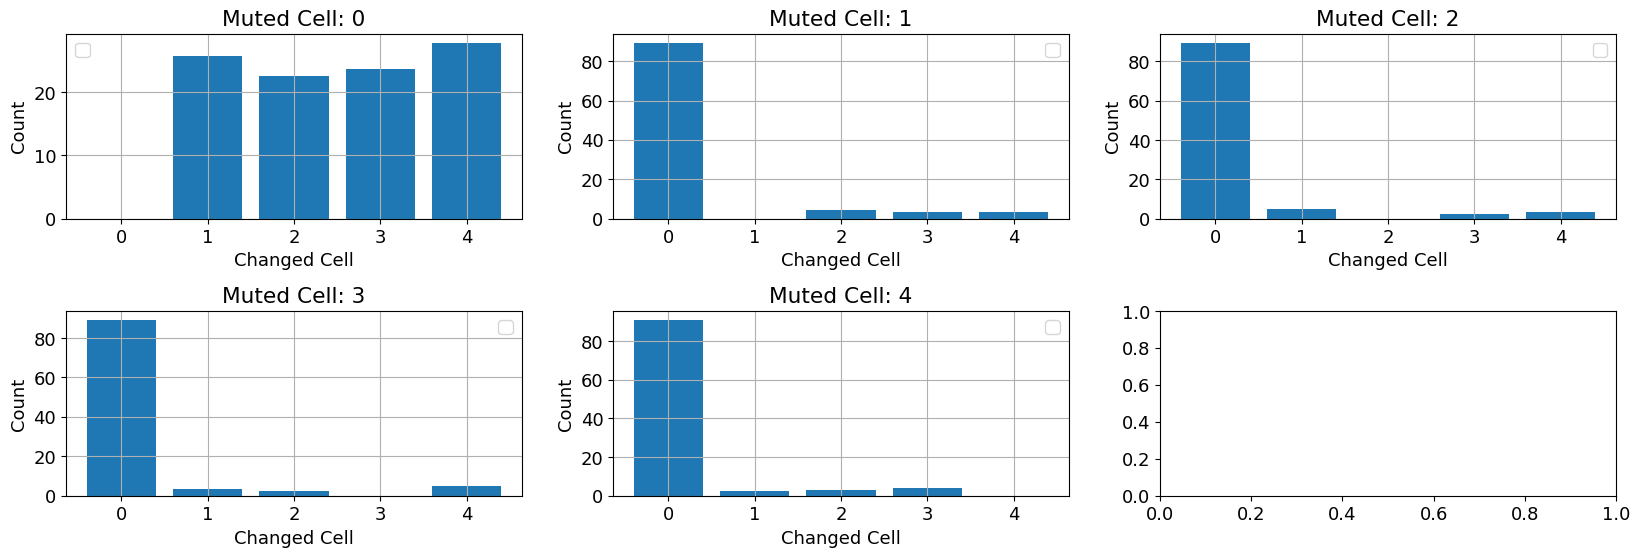

In [161]:
fig, axes = plt.subplots(2, 3, figsize=(20,6))
axes_straight = axes.flatten()
plt.subplots_adjust(wspace=0.2)
plt.subplots_adjust(hspace = 0.5)
ax_res = zip(axes_straight, sorted_dict.items())
counter = 0
for ax, (k, v) in ax_res:
    ax.bar(v.keys(), v.values())
    ax.set_title('Muted Cell: ' + str(k))
    ax.set_xlabel('Changed Cell')
    ax.set_ylabel('Count')
    ax.legend()
    ax.grid()


In [167]:
def muting_across_rb(dnames):
    rb_for_muting = defaultdict(lambda:0)
    total_muting_decisions = 0
    for dname in dnames:
        file = open(dname)
        lines = file.readlines()
        for line in lines:
            if 'Muting Decision: ' in line:
                total_muting_decisions += 1
                spl = line.split()
                rb_id = int(spl[2])
                rb_for_muting[rb_id] += 1

    for k, v in rb_for_muting.items():
        rb_for_muting[k] = (v/total_muting_decisions)*100
    sorted_dict = dict(sorted(rb_for_muting.items()))
    return sorted_dict

In [168]:
print(files)

['uni_logs/320_newdep_repeat/mu_8_pf_diff_objective/muting_0.log', 'uni_logs/320_newdep_repeat/mu_8_pf_diff_objective/muting_1.log', 'uni_logs/320_newdep_repeat/mu_8_pf_diff_objective/muting_2.log', 'uni_logs/320_newdep_repeat/mu_8_pf_diff_objective/muting_3.log', 'uni_logs/320_newdep_repeat/mu_8_pf_diff_objective/muting_4.log', 'uni_logs/320_newdep_repeat/mu_8_pf_diff_objective/muting_5.log', 'uni_logs/320_newdep_repeat/mu_8_pf_diff_objective/muting_6.log', 'uni_logs/320_newdep_repeat/mu_8_pf_diff_objective/muting_7.log', 'uni_logs/320_newdep_repeat/mu_8_pf_diff_objective/muting_8.log', 'uni_logs/320_newdep_repeat/mu_8_pf_diff_objective/muting_9.log']


99.99999999999997


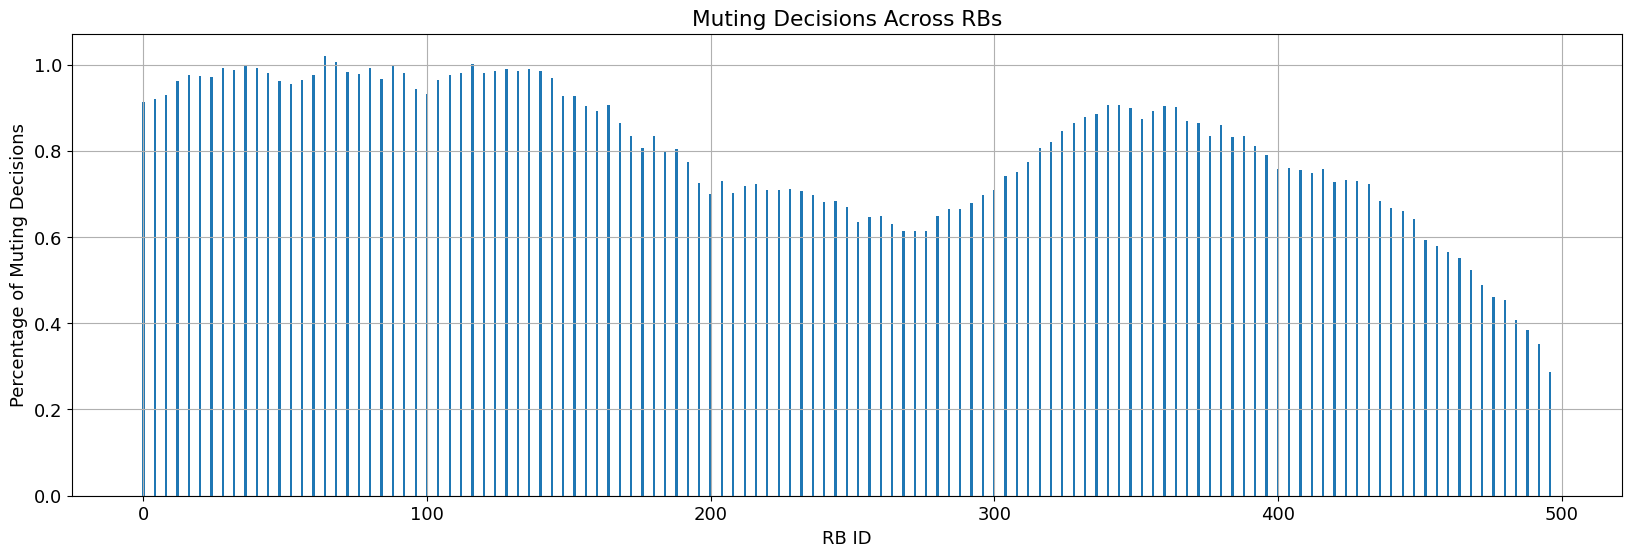

In [175]:
x = muting_across_rb(files)

print(sum(x.values()))

plt.figure(figsize=(20,6))
plt.bar(x.keys(), x.values())

plt.xlabel('RB ID')
plt.ylabel('Percentage of Muting Decisions')
plt.title('Muting Decisions Across RBs')
plt.grid()
plt.show()


In [8]:
def mute_cell_small_cell(dnames):
    results = defaultdict(lambda:defaultdict(int))
    total_muting_decisions = 0

    for dname in dnames:
        file = open(dname)
        for line in file.readlines():
            if 'Muting Decision: ' in line:
                total_muting_decisions += 1
            if 'Benefitting Slice: ' in line:
                spl = line.split()
                muted_cell = int(spl[5])
                benefitting_cell = int(spl[8])
                results[muted_cell][benefitting_cell] += 1

    for k, v in results.items():
        for k1, v1 in v.items():
            results[k][k1] = (v1/total_muting_decisions)*100

    return results

In [11]:
result = mute_cell_small_cell(files)
sorted_dict = dict(sorted(result.items(), key=lambda item: item[0]))
display(sorted_dict)

{1: defaultdict(int,
             {2: 0.1920618953827558,
              4: 0.16960249585181697,
              3: 0.17259708245594216}),
 2: defaultdict(int,
             {4: 0.19042848450777844,
              1: 0.21166282588248425,
              3: 0.12550040222742795}),
 3: defaultdict(int,
             {4: 0.365884035994931,
              2: 0.2410642216320769,
              1: 0.25875950611099846}),
 4: defaultdict(int,
             {3: 0.19696212800768792,
              2: 0.15639909127908322,
              1: 0.1580325021540606})}

In [16]:
print(sorted_dict.keys())

dict_keys([1, 2, 3, 4])


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


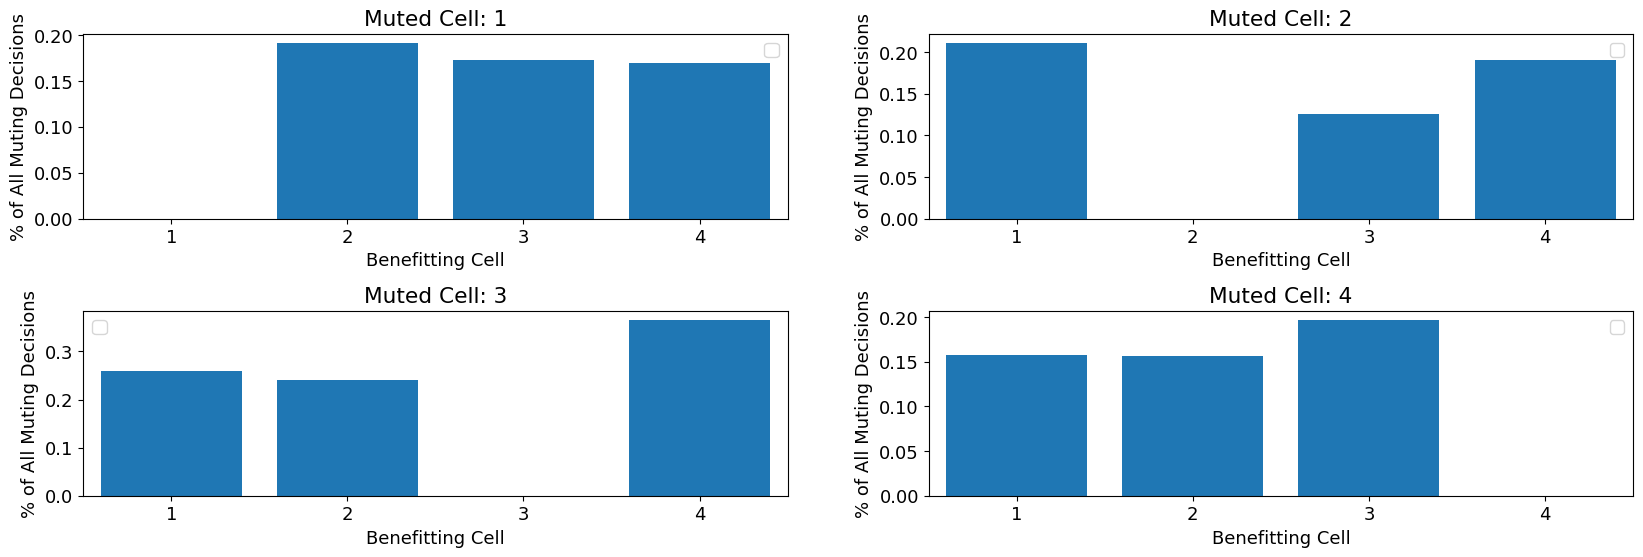

In [20]:
fig, axes = plt.subplots(2, 2, figsize=(20,6))
axes_straight = axes.flatten()
plt.subplots_adjust(wspace=0.2)
plt.subplots_adjust(hspace = 0.5)
ax_res = zip(axes_straight, sorted_dict.items())
# set xticks

counter = 0
for ax, (k, v) in ax_res:
    ax.bar(v.keys(), v.values())
    ax.set_title('Muted Cell: ' + str(k))
    ax.set_xlabel('Benefitting Cell')
    ax.set_ylabel('% of All Muting Decisions')
    ax.set_xticks(list(range(1, 5)))
    ax.set_xlim(0.5, 4.5)
    ax.legend()


In [5]:
def get_muting_order(dname):
    tti_muting = defaultdict(lambda:defaultdict(list))
    total_muting_decisions = 0
    file = open(dname)
    lines = file.readlines()
    for line in lines:
        if 'Muting Decision: ' in line:
            spl = line.split()
            tti = int(spl[8])
            cell_id = int(spl[6])
            rb_id = int(spl[2])
            tti_muting[tti][rb_id].append(cell_id)
    return tti_muting


In [7]:
res = get_muting_order('uni_logs/160_newdep/ea_pf_pf_8_single_mute/muting_0.log')
file = open('muting_order.csv', 'w')
for tti, rb in res.items():
    for rb_id, cell_ids in rb.items():
        file.write(f'{tti}, {rb_id}, {cell_ids[0]}\n')

NameError: name 'get_muting_order' is not defined

In [21]:
ue_tp_mute = get_per_ue_throughput('uni_logs/160_newdep/ea_pf_diff_8_uniform_deduction/muting_1.log')
ue_tp_nomute = get_per_ue_throughput('uni_logs/160_newdep/ea_pf_diff_8_uniform_deduction/1.log')
ue_slice = get_ue_slice_comb('uni_logs/160_newdep/ea_pf_diff_8_uniform_deduction/1.log')
print(ue_slice)
ues_slice_2 = ue_slice[3]
print(ues_slice_2)


ues_slice_2_tp_mute = defaultdict(lambda:0)
for ue, tp in ue_tp_mute.items():
    if ue in ues_slice_2:
        ues_slice_2_tp_mute[ue] = tp



ues_slice_2_tp_nomute = defaultdict(lambda:0)
for ue, tp in ue_tp_nomute.items():
    if ue in ues_slice_2:
        ues_slice_2_tp_nomute[ue] = tp


defaultdict(<function get_ue_slice_comb.<locals>.<lambda> at 0x7fbc2da2b160>, {2: [10, 28, 47, 79, 151, 9, 51, 130, 19, 83, 15, 67, 18, 76, 139, 96, 107, 144, 156, 65, 116, 134], 3: [11, 50, 80, 13, 58, 21, 87, 155, 16, 88, 25, 94, 146, 66, 117, 138, 110, 97, 152, 29], 6: [20, 57, 106, 37, 105, 91, 41, 113, 54, 145, 40, 131, 114, 157, 72, 35, 121], 7: [23, 38, 43, 118, 52, 133, 44, 125, 61, 115, 73, 100, 60, 122, 85, 158], 0: [24, 75, 123, 4, 48, 2, 68, 101, 140, 3, 55, 135, 63, 132, 1, 62, 86, 126, 0, 109, 148, 39, 159], 4: [30, 153, 27, 74, 89, 124, 34, 92, 42, 150, 70, 22, 95, 81, 53, 102, 119, 141, 12], 1: [46, 93, 149, 49, 6, 78, 103, 7, 59, 69, 137, 8, 77, 127, 5, 128, 143, 136, 17, 26, 64, 112], 5: [71, 154, 31, 98, 129, 36, 99, 45, 111, 14, 120, 90, 142, 32, 82, 33, 104]})
[11, 50, 80, 13, 58, 21, 87, 155, 16, 88, 25, 94, 146, 66, 117, 138, 110, 97, 152, 29]


In [22]:
print(len(ues_slice_2_tp_mute))
for k,v in ues_slice_2_tp_mute.items():
    if (ues_slice_2_tp_mute[k] < ues_slice_2_tp_nomute[k]):
        print(k, end=' ')

20
11 50 80 21 155 94 138 25 97 152 117 66 29 